In [1]:
import pandas as pd
from utilities.data_manager import DataManager
from utilities.backtest_analysis import BacktestAnalysis
from strategies import simple_sma as strat

/home/spoonbill/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
symbol = "BTC/USDT"
data = DataManager(name="binance")
ohlcv = data.load(symbol, timeframe="1d")

In [3]:
strategy_params = {
    'fast_ma_period': 100,
    'slow_ma_period': 200,
    'trend_ma_period': 300,
    'position_size_percentage': 100, #  % of the total balance
    # 'position_size_fixed_amount': 100, #  fixed entry amount
    # 'position_size_exposure': 2, #  engaged % risk, i.e. % of total balance lost if stop loss hit
    # 'mode': "long", "short", "both" (default)
}
strategy = strat.Strategy(strategy_params, ohlcv)
strategy.run_backtest(initial_balance=1000, leverage=1, fee_rate=0.0006)

In [4]:
# strategy.save_equity_record(symbol.replace('/', '-').replace(':', '-'))
# strategy.save_trades_info(symbol.replace('/', '-').replace(':', '-'))

In [5]:
results = BacktestAnalysis(strategy)
results.print_metrics()

--- General ---
Period: [2017-08-17 00:00:00] -> [2025-08-13 00:00:00]
Initial balance: 1000.0 $
Final balance: 1714.94 $
Performance: 71.49 %
Hodl performance: 2777.58%
Performance/Hodl: -94.04 %
Total trades: 9
Time in position: 13.06 %

--- Health ---
Win rate: 55.56 %
Max drawdown at trade close: -27.92 %
Max drawdown at equity update: -41.9 %
Profit factor: 1.5
Return over max drawdown: 1.71
Sharpe ratio: 0.43
Sortino ratio: 0.25
Calmar ratio: 0.21

--- Trades ---
Average net PnL: 6.69 %
Average trades per day: 0.003
Average trades duration: 42 days 08:00:00
Best trade: +29.84 % entered 2023-11-07 00:00:00 exited 2024-01-08 00:00:00
Worst trade: -15.1 % entered 2024-11-15 00:00:00 exited 2025-03-11 00:00:00
Total winning trades: 5
Total loosing trades: 4
Average net PnL winning trades: 24.12 %
Average net PnL loosing trades: -15.1 %
Mean winning trades duration: 41 days 09:36:00
Mean loosing trades duration: 43 days 12:00:00
Max win streak: 3
Max lose streak: 2
Open reasons:
Open 

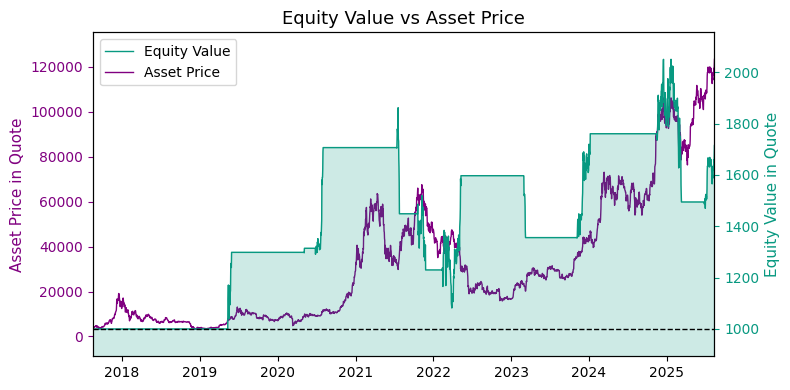

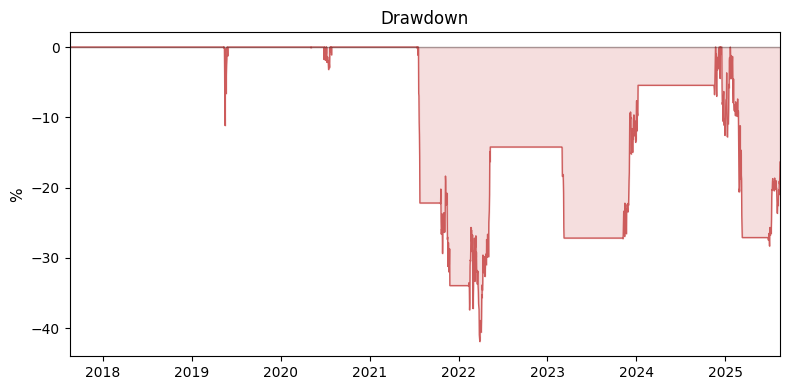

In [6]:
results.plot_equity()
results.plot_drawdown()

/home/spoonbill/Projects/RobotTraders/CryptoStrategyLab/code/utilities/backtest_analysis.py:431: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(lower_limit, upper_limit)


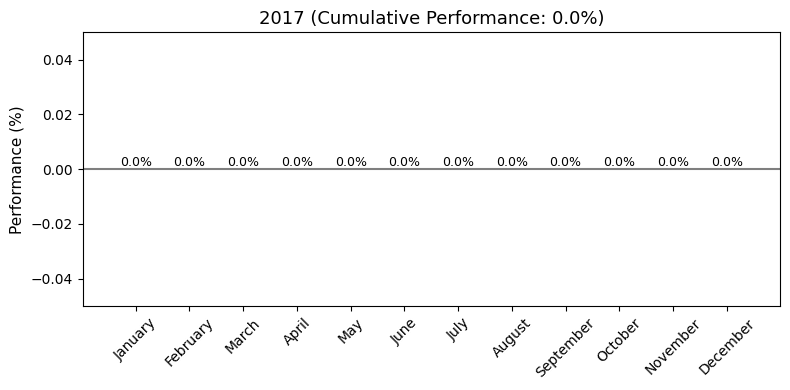

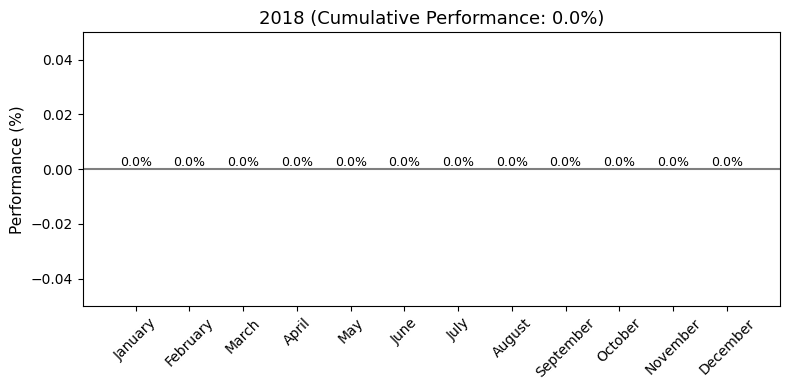

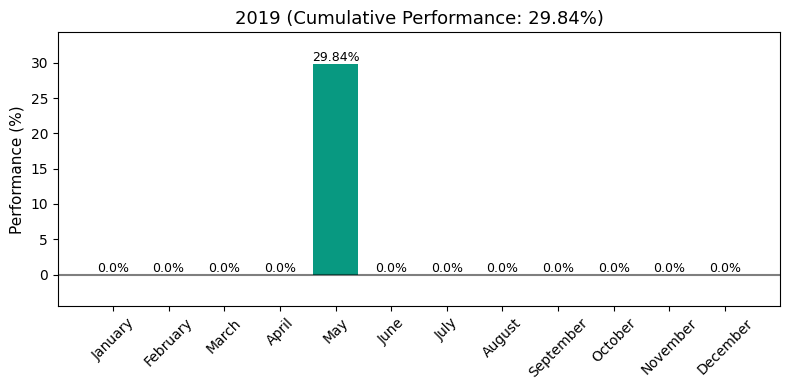

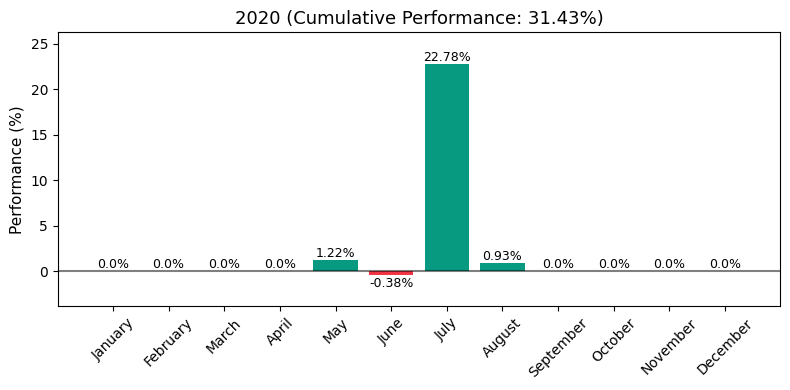

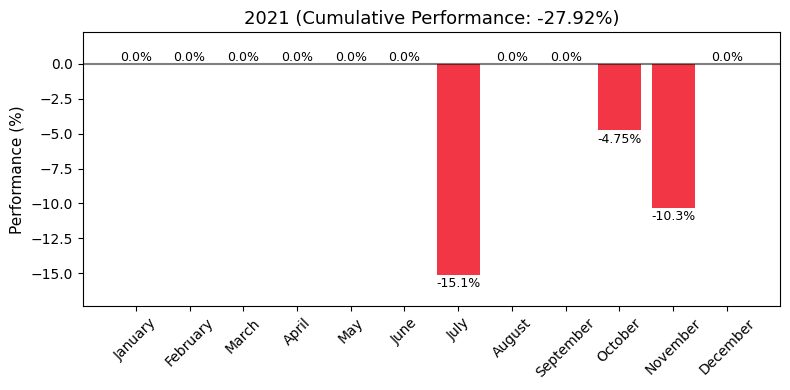

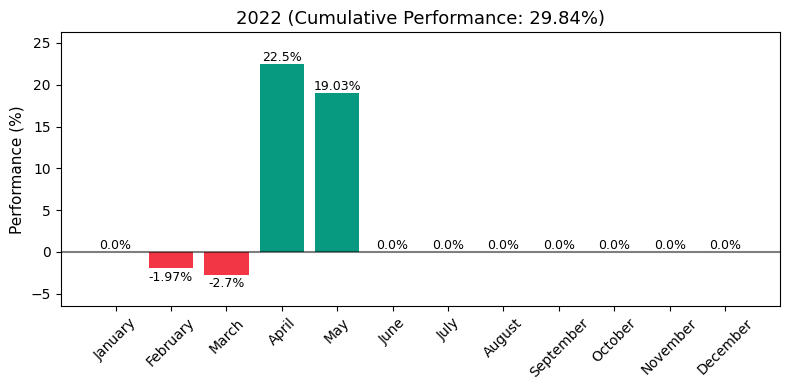

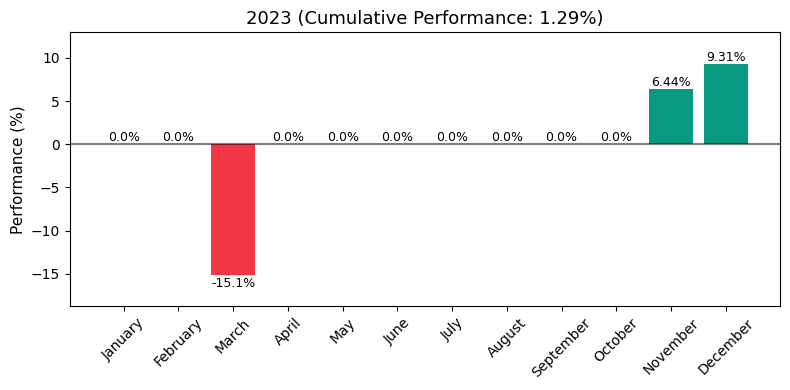

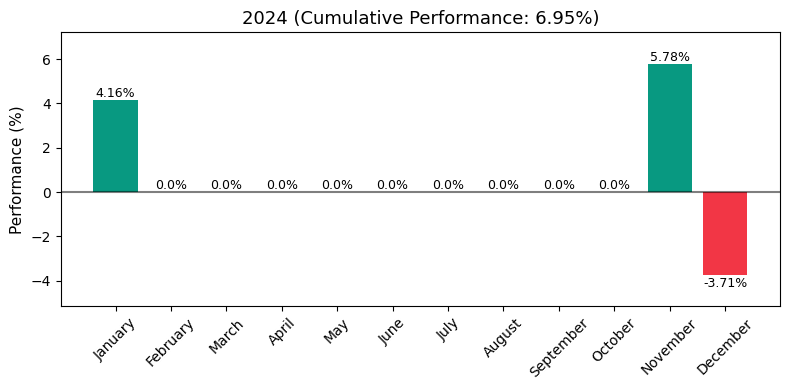

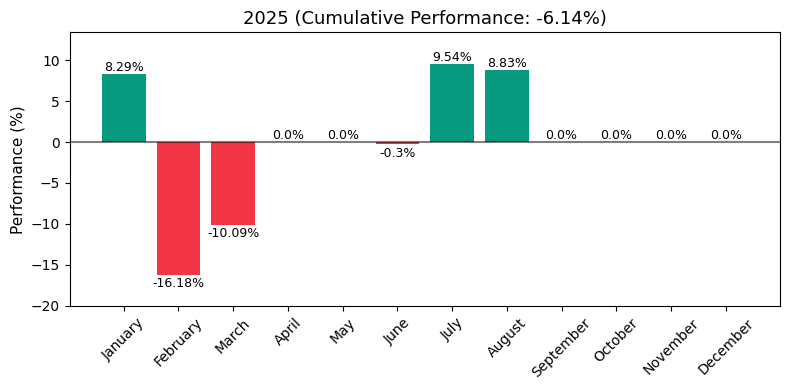

In [7]:
results.plot_monthly_performance()

In [ ]:
indicators = {
    'fastMA': {
        'color': "gold",
        'df': pd.DataFrame({
            'time': strategy.data.index,
            'fastMA': strategy.data['fastMA'],
        }).dropna()        
    }, 
    'slowMA': {
        'color': "purple",
        'df': pd.DataFrame({
            'time': strategy.data.index,
            'slowMA': strategy.data['slowMA'],
        }).dropna()        
    },    
    'trend': {
        'color': "white",
        'df': pd.DataFrame({
            'time': strategy.data.index,
            'trend': strategy.data['trend'],
        }).dropna()        
    },   
}

results.plot_candlestick(indicators=indicators)